# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
#image_path = '...'

A = imread("TarantulaNebula.jpg")

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

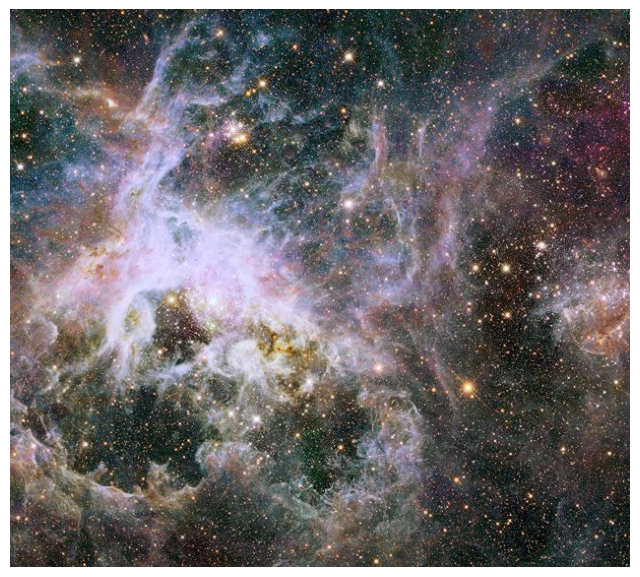

In [2]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

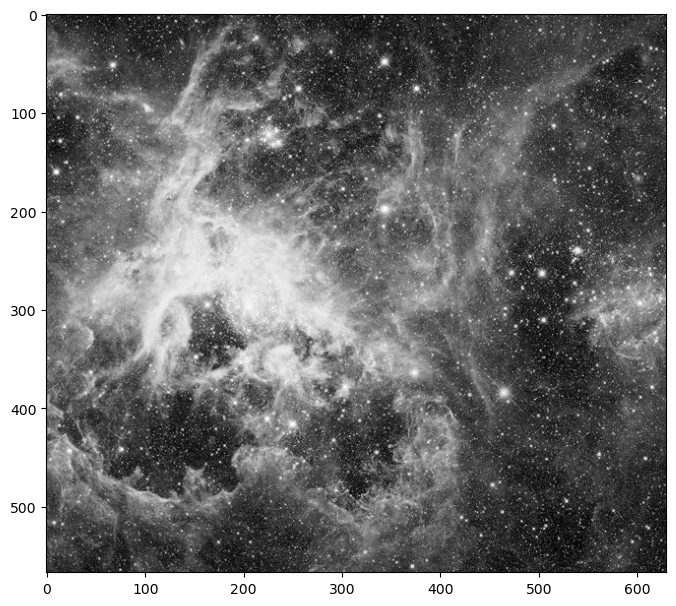

In [8]:
# fill here
X = np.mean(A,axis=2)
plt.imshow(X, cmap='gray')

What is the picture size?

In [9]:
X.shape

(567, 630)

Perform the SVD decomposition

In [ ]:
# fill here

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

In [ ]:
# fill here

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

In [ ]:
# fill here

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

In [ ]:
# fill here